In [42]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 1. Load dataset


In [43]:
pd.set_option("display.max_columns", None)
df= pd.read_csv("C:/Users/joury/Downloads/iris/iris.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


## 2. Data Quality Assessment
### 2.1 Check Data Types 

In [44]:
df.dtypes

sepal_length    str
sepal_width     str
petal_length    str
petal_width     str
class           str
dtype: object

We observed that all of the data types are strings that may lead to improper calculations, were going to change them into floats.

In [45]:
df["sepal_length"] = pd.to_numeric(df["sepal_length"], errors="coerce")
df["sepal_width"]  = pd.to_numeric(df["sepal_width"], errors="coerce")
df["petal_length"] = pd.to_numeric(df["petal_length"], errors="coerce")
df["petal_width"]  = pd.to_numeric(df["petal_width"], errors="coerce")
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class               str
dtype: object

## 3. Handling Missing Values
### 3.1 Detect Missing Values

In [46]:
df.isna().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           0
dtype: int64

The values show that there are missing values in all of the categories; we are using strategy one because our missing values are a small number.
### Removing records 

In [47]:
df_missing = df.copy()
df_removed = df_missing.dropna()
df_removed.shape

(150, 5)

## 4. Handling Outliers

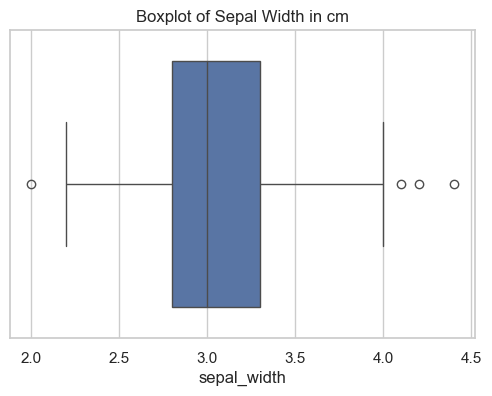

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['sepal_width'])
plt.title("Boxplot of Sepal Width in cm")
plt.show()

we can see that there are some outliers in the sepal width column, we can remove them by using the IQR method. 
### Detect Outliers using IQR
`Q1 - 1.5×IQR`  and  `Q3 + 1.5×IQR`

In [49]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['sepal_width'] < lower) | (df['sepal_width'] > upper)]
outliers.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class
16,5.7,4.4,1.5,0.4,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa
61,5.0,2.0,3.5,1.0,Iris-versicolor


### Capping Outliers (Percentile Method)
Instead of removing outliers, we replace extreme values with percentile limits.

In [50]:
lower_cap = df['sepal_width'].quantile(0.05)
upper_cap = df['sepal_width'].quantile(0.95)

df_capped = df.copy()
df_capped['sepal_width'] = df_capped['sepal_width'].clip(lower_cap, upper_cap)

Although several values were flagged as outliers using the IQR method, they were retained because they represent valid biological variation within the species.

## 5. Data Transformation – Normalization
### Min-Max Normalization



In [51]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2


In [52]:
!python -m pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()

df_scaled[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df_scaled)

df_scaled.head()


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,0.222222,0.625000,0.067797,0.041667
2,0.166667,0.416667,0.067797,0.041667
3,0.111111,0.500000,0.050847,0.041667
4,0.083333,0.458333,0.084746,0.041667


### Z-Score Normalization


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()

df_standardized[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df_standardized)

df_standardized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,-0.900681,1.032057,-1.341272,-1.312977
2,-1.143017,-0.124958,-1.341272,-1.312977
3,-1.385353,0.337848,-1.398138,-1.312977
4,-1.506521,0.106445,-1.284407,-1.312977


## Check Correlation Before Applying PCA

we will check whether numerical features are correlated. If features are strongly correlated, they contain overlapping information.

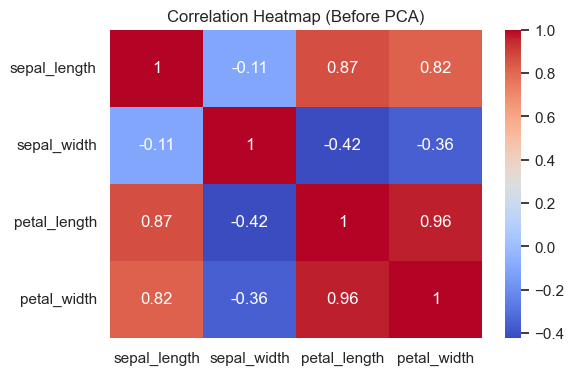

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(df_standardized[['sepal_length','sepal_width','petal_length','petal_width']].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Before PCA)")
plt.show()

The heatmap shows the correlation between the numerical features:

* The diagonal values are 1 because each feature is perfectly correlated with itself.
* The correlation between `petal_length` and `petal_width` is strongly positive (close to 1).
* `sepal_length` has moderate positive correlation with the petal features.
* `sepal_width` shows weak or slight negative correlation with some features.

A correlation value close to 1 indicates a strong positive linear relationship, meaning the two features increase together.

This means that `petal_length` and `petal_width` move together in a predictable linear pattern.

Since PCA is most useful when features are strongly correlated, the strong relationship between the petal measurements suggests that dimensionality reduction can be effective.

Therefore, applying PCA is appropriate because it can reduce redundancy while preserving most of the dataset’s variance.


## 6. Data Reduction – Principal Component Analysis (PCA)

In [60]:
features = ['sepal_length', 'sepal_width', 
            'petal_length', 'petal_width']

df_clean = df.copy()
df_clean[features] = df_clean[features].fillna(df_clean[features].mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72770452 0.23030523]


The explained variance ratio shows that the first principal component accounts for approximately 72.77% of the total variance, while the second principal component explains about 23.03%. Together, the first two components capture approximately 95.8% of the dataset’s variance. This indicates that most of the information in the four original features can be effectively represented using only two principal components, confirming that PCA is suitable for dimensionality reduction in this dataset.

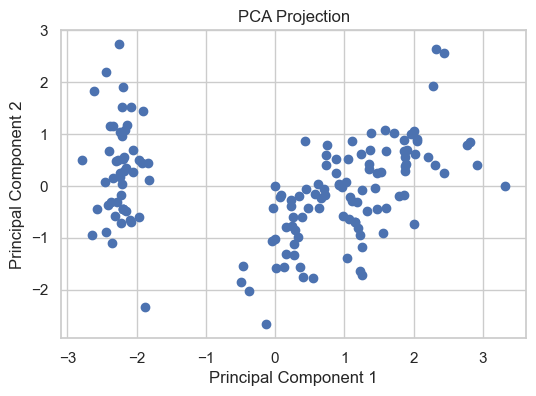

In [61]:
plt.figure(figsize=(6,4))
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()